### Library

In [18]:
import pandas as pd
import os
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
mpl.rc('font',family = 'Malgun Gothic')
from collections import Counter
from PIL import Image
import numpy as np

### Data Load

In [8]:
os.chdir("C:/Users/JYW/Desktop/Github/Data-Science-for-COVID-19")

data = pd.read_csv("insta_csvtext2.csv")
data = data.iloc[:,1:]

location = data.iloc[:,0]
location = [x for x in location if str(x) != '[']
location = [x for x in location if str(x) != '0']

time = data.iloc[:,1]

hash = data.iloc[:,2:]
hash = list(hash.values.flatten())
hash = [x for x in hash if str(x) != 'nan']

### 1. Location

In [2]:
loc = pd.DataFrame(pd.Series(location).value_counts())
loc.head(30)

,0
"Seoul, South Korea",49
"Seoul, Korea",47
"Daegu, South Korea",31
"Busan, South Korea",23
"Ulsan, South Korea",17
방이동 바티칸 Bartican,16
South Korea,13
"Busan 釜山, South Korea",12
우리집,12
Daejeon,11


### 2. Time

In [9]:
time = time.value_counts().sort_index()
time

0              319
2018-05-14       1
2018-06-09       1
2018-06-27       1
2018-07-11       1
              ... 
2020-04-16      20
2020-04-17      27
2020-04-18    3091
2020-04-19    3347
2020-04-20    1668
Name: 1, Length: 66, dtype: int64

### 3. Hashtags

In [12]:
pd.Series(hash).value_counts().head(40)

코로나         7121
코로나19       1469
일상          1285
마스크필수       1146
코로나예방       1093
마스크추천       1051
미세먼지마스크     1047
일회용마스크      1046
필터마스크       1041
닥터홍헤파필터     1039
닥터홍마스크필터    1038
맞팔           976
좋아요          855
소통           685
데일리          600
선팔           570
좋아요반사        568
좋반           555
마스크          532
daily        517
팔로우          487
셀스타그램        392
셀카           391
사회적거리두기      386
선팔하면맞팔       370
주말           357
일상스타그램       342
ootd         333
집콕           331
셀피           310
selfie       288
봄            274
인친           239
fff          232
f4f          229
여행           225
오오티디         203
follow       195
대구           194
조심           192
dtype: int64

광고성 글, 맞팔 관련 해시태그는 지우고 보자!

In [20]:
ban_list = ["코로나","코로나19","일회용마스크","미세먼지마스크","필터마스크","닥터홍헤파필터","닥터홍마스크필터",
            "맞팔","좋아요","소통","선팔","좋아요반사","좋반","팔로우","인친","맞팔해요","선팔하면맞팔"]
hash = [x for x in hash if x not in ban_list]
pd.Series(hash).value_counts().head(40)

instafoodie      1
93a12c86         1
닭백숙              1
미메이라             1
조치원방방            1
작사스타그램           1
도구해수욕장           1
본업은힘들어           1
무한연기             1
france           1
bag              1
선상낚시             1
노랭이💛             1
koreanstyle      1
죠리퐁빙수            1
클래식볼링            1
판교조향공방           1
낭만과              1
어린이집생활           1
7세피아노            1
과제끝              1
신약개발             1
韓国人と繋がりたい        1
지키는중             1
화서문              1
글스타그램            1
아빠가              1
키즈키즈놀이체육         1
비슬산참꽃            1
주모오오오오           1
것인가              1
프라이빗헤어           1
돌봄쿠폰신나게쓰는중       1
제2청년부            1
일욜오후             1
프불은사랑입니다         1
빨리가              1
꼬질꼬질             1
beverlycenter    1
오레오              1
dtype: int64

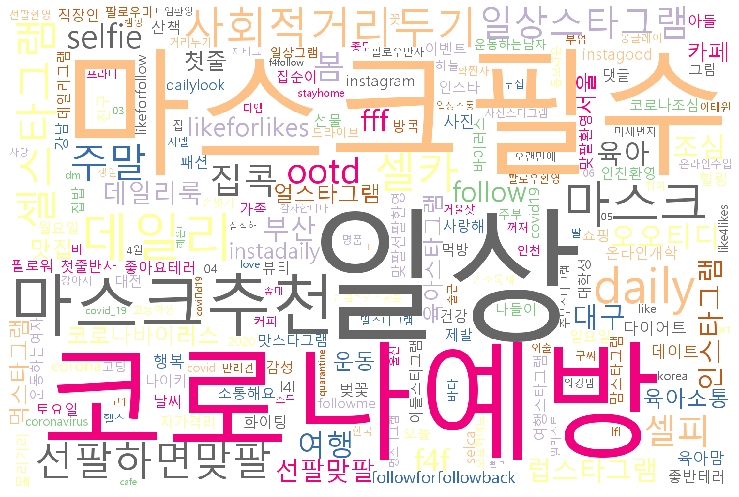

In [16]:
hash = Counter(hash)
hash_count = dict(hash.most_common(1000))

wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(hash_count)

fig = plt.figure(1,figsize=(13,13))
fig = plt.axis('off')
plt.imshow(wordcloud)

쫌 더 귀여운 모습으로!!

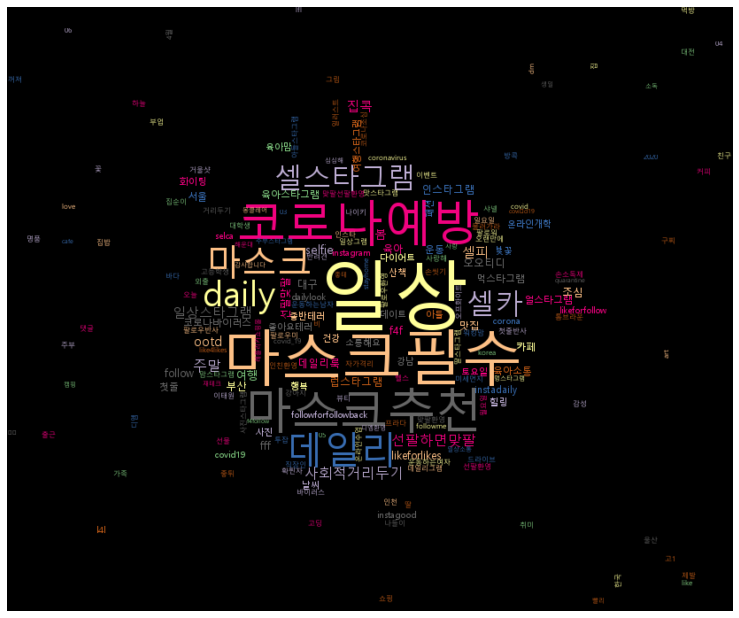

In [21]:
img = np.array(Image.open('covid.jpg'))

wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='black',colormap = "Accent_r",  mask = img, margin=1).generate_from_frequencies(hash_count)
wordcloud = wordcloud.to_array()

fig = plt.figure(1,figsize=(13,13))
fig = plt.axis('off')
plt.imshow(wordcloud, interpolation="bilinear")